In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler

In [3]:
import yfinance as yf

In [4]:
dataset = yf.download('IBM', start='2015-01-01',end='2021-12-31',progress=False)

In [5]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,154.216064,156.128113,153.919693,154.933075,113.538879,5779673
2015-01-05,154.177826,154.177826,152.189301,152.495224,111.752365,5104898
2015-01-06,152.648178,152.925430,148.346085,149.206497,109.342293,6429448
2015-01-07,150.286804,150.286804,147.256210,148.231354,108.627686,4918083
2015-01-08,149.369019,152.045883,148.709366,151.453156,110.988686,4431693
...,...,...,...,...,...,...
2021-12-23,130.000000,130.960007,129.520004,130.630005,129.075226,3649000
2021-12-27,130.630005,131.649994,129.949997,131.619995,130.053436,4293900
2021-12-28,131.600006,133.220001,131.589996,132.630005,131.051422,3445200


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1762 non-null   float64
 1   High       1762 non-null   float64
 2   Low        1762 non-null   float64
 3   Close      1762 non-null   float64
 4   Adj Close  1762 non-null   float64
 5   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,137.061695,138.134445,135.983931,137.058281,114.991744,4.899183e+06
std,14.925635,14.786556,15.033781,14.916494,9.882624,2.925635e+06
min,90.439774,93.441681,86.577438,90.602295,81.833809,1.247878e+06
25%,127.442638,128.415386,126.326483,127.335085,109.747663,3.311218e+06
50%,137.318359,138.283936,136.276291,137.294456,114.985699,4.160988e+06
75%,147.265770,148.114246,146.309753,147.222759,120.283073,5.456119e+06
max,173.996170,174.751434,172.963669,173.948380,139.418823,3.981442e+07


In [8]:
dataset.shape

(1762, 6)

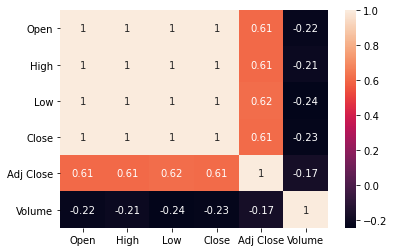

In [9]:
dataset = pd.DataFrame(dataset,columns=['Open','High','Low','Close','Adj Close','Volume'])
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset)
scaled = scaler.fit_transform(dataset)
scaled_dataset = pd.DataFrame(scaled, columns=dataset.columns)

In [11]:
scaled_dataset = scaled_dataset.copy()
scaled_dataset["y"] = np.where(scaled_dataset["Adj Close"].shift(-1) > scaled_dataset["Close"], 1, -1)

In [12]:
scaled_dataset = scaled_dataset.rename(columns={"Adj Close":"AdjClose"})
scaled_dataset

,Open,High,Low,Close,AdjClose,Volume,y
0,0.763272,0.770958,0.779548,0.771851,0.550578,0.117506,-1
1,0.762815,0.746972,0.759518,0.742602,0.519555,0.100009,-1
2,0.744508,0.731570,0.715029,0.703143,0.477702,0.134354,-1
3,0.716247,0.699118,0.702413,0.691443,0.465293,0.095166,-1
4,0.705263,0.720752,0.719234,0.730099,0.506293,0.082554,-1
...,...,...,...,...,...,...,...
1757,0.473455,0.461425,0.497100,0.480259,0.820377,0.062259,1
1758,0.480995,0.469911,0.502077,0.492137,0.837364,0.078981,1
1759,0.492604,0.489220,0.521062,0.504255,0.854695,0.056975,1
1760,0.502178,0.501395,0.529281,0.512894,0.867049,0.077581,1


In [20]:
data = scaled_dataset.copy()
data["50_sma"] = data["Adj Close"].rolling(50).mean()
data["200_sma"] = data["Adj Close"].rolling(200).mean()

data = data.dropna() 
data["signal"] = data.apply(lambda row: 1 if row[f"50_sma"] > row[f"200_sma"]  else 0, axis=1)


In [21]:
data

,Open,High,Low,Close,Adj Close,Volume,y,50_sma,200_sma,signal
199,0.639016,0.628571,0.649624,0.637990,0.450788,0.062128,-1,0.426598,0.546675,0
200,0.632151,0.614109,0.639885,0.624570,0.436225,0.183391,-1,0.425130,0.546103,0
201,0.547941,0.530747,0.550133,0.526153,0.329431,0.402289,1,0.421119,0.545153,0
202,0.522311,0.528160,0.539398,0.529364,0.332916,0.157242,1,0.417487,0.544429,0
203,0.539359,0.556496,0.565073,0.565726,0.372372,0.119071,1,0.414483,0.543964,0
...,...,...,...,...,...,...,...,...,...,...
1757,0.473455,0.461425,0.497100,0.480259,0.820377,0.062259,1,0.674625,0.790934,0
1758,0.480995,0.469911,0.502077,0.492137,0.837364,0.078981,1,0.673370,0.792127,0
1759,0.492604,0.489220,0.521062,0.504255,0.854695,0.056975,1,0.672066,0.793331,0
1760,0.502178,0.501395,0.529281,0.512894,0.867049,0.077581,1,0.671750,0.794623,0


The golden cross occurs when a short-term moving average crosses over a major long-term moving average to the upside and is interpreted by analysts and traders as signaling a definitive upward turn in a market.

In [23]:
list_golden_cross_ts = []
first_golden_cross = False

In [26]:
for idx, each in data['signal'].iteritems():
    if each == 1:
        # If its the first golden cross we see we add the timestamp
        if first_golden_cross:
            list_golden_cross_ts.append(idx)
            first_golden_cross = False
    else:
        first_golden_cross = True

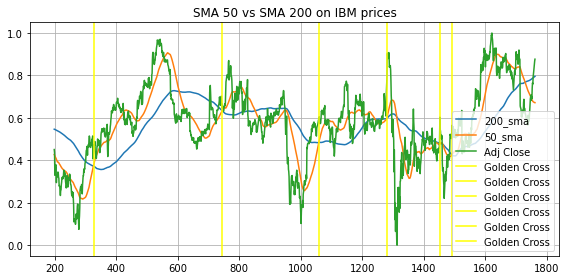

In [28]:
fig, axes = plt.subplots(1,1, figsize=(8,4))
data[["200_sma","50_sma","Adj Close"]].plot(figsize=(8,4), grid=True, title="SMA 50 vs SMA 200 on IBM prices", ax=axes)

for each in list_golden_cross_ts:
    axes.axvline(x=each, label="Golden Cross", c="yellow")
    
axes.legend()
fig.tight_layout()

# Strategy num 1

In [29]:
training_set = scaled_dataset.iloc[:,1:2].values

In [30]:
training_set

array([[0.77095833],
       [0.74697244],
       [0.73156967],
       ...,
       [0.48921954],
       [0.50139527],
       [0.50336291]])

In [31]:
training_set.shape

(1762, 1)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.77095833],
       [0.74697244],
       [0.73156967],
       ...,
       [0.48921954],
       [0.50139527],
       [0.50336291]])

In [33]:
scaled_dataset

,Open,High,Low,Close,Adj Close,Volume,y
0,0.763272,0.770958,0.779548,0.771851,0.550578,0.117506,-1
1,0.762815,0.746972,0.759518,0.742602,0.519554,0.100009,-1
2,0.744508,0.731570,0.715029,0.703143,0.477702,0.134354,-1
3,0.716247,0.699118,0.702413,0.691443,0.465293,0.095166,1
4,0.705263,0.720752,0.719234,0.730099,0.506293,0.082554,1
...,...,...,...,...,...,...,...
1757,0.473455,0.461425,0.497100,0.480259,0.820377,0.062259,1
1758,0.480995,0.469911,0.502077,0.492137,0.837364,0.078981,1
1759,0.492604,0.489220,0.521062,0.504255,0.854695,0.056975,1
1760,0.502178,0.501395,0.529281,0.512894,0.867049,0.077581,1


In [46]:
#defining predictors
X = scaled_dataset.drop(columns = ["y"])
y = scaled_dataset["y"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
print(f"No. of training examples:{X_train.shape[0]}")
print(f"No. of testing examples:{X_test.shape[0]}")

No. of training examples:1409
No. of testing examples:353


# K-Nearest Neighbors


In [50]:
#Fit the model in training set and using scalar transform
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
#using classifiers/model knn = 5
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
#Making the prediction system using classifier and prediction
y_pred = classifier.predict(X_test)

In [53]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
knn_result = accuracy_score(y_test,y_pred)
print("Accuracy:",knn_result*100)

Confusion Matrix:
[[84 95]
 [77 97]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.47      0.49       179
           1       0.51      0.56      0.53       174

    accuracy                           0.51       353
   macro avg       0.51      0.51      0.51       353
weighted avg       0.51      0.51      0.51       353

Accuracy: 51.27478753541076


An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

AUC: 0.53


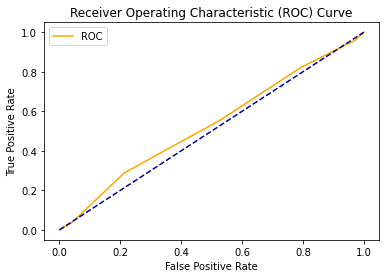

In [54]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = KNeighborsClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Random Forest

In [55]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [57]:
#fit the model on train dataset
model.fit(X_train, y_train)


y_pred =  model.predict(X_test)

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
rf_result = accuracy_score(y_test,y_pred)
print("Accuracy:",rf_result*100)

Confusion Matrix:
[[84 95]
 [77 97]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.47      0.49       179
           1       0.51      0.56      0.53       174

    accuracy                           0.51       353
   macro avg       0.51      0.51      0.51       353
weighted avg       0.51      0.51      0.51       353

Accuracy: 51.27478753541076


AUC: 0.50


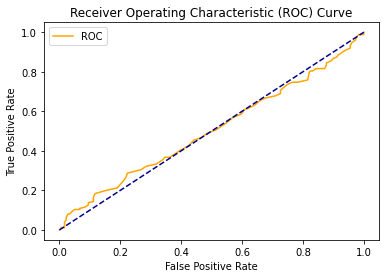

In [58]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = RandomForestClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [61]:
#fit the model on train dataset
model.fit(X_train, y_train)

y_pred =  model.predict(X_test)

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
clf_result = accuracy_score(y_test,y_pred)
print("Accuracy:",clf_result*100)

Confusion Matrix:
[[92 87]
 [81 93]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.53      0.51      0.52       179
           1       0.52      0.53      0.53       174

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353

Accuracy: 52.40793201133145


AUC: 0.49


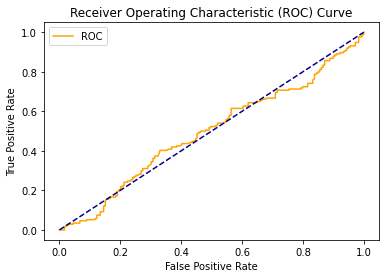

In [62]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = GradientBoostingClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Support Vector Machine

In [63]:
from sklearn.svm import SVC

In [64]:
from sklearn.svm import SVC
svm = SVC (kernel="linear", C=0.025, random_state=101)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

In [65]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
svm_result = accuracy_score(y_test,y_pred)
print("Accuracy:",svm_result*100)

Confusion Matrix:
[[  0 179]
 [  0 174]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       179
           1       0.49      1.00      0.66       174

    accuracy                           0.49       353
   macro avg       0.25      0.50      0.33       353
weighted avg       0.24      0.49      0.33       353

Accuracy: 49.29178470254957


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.52


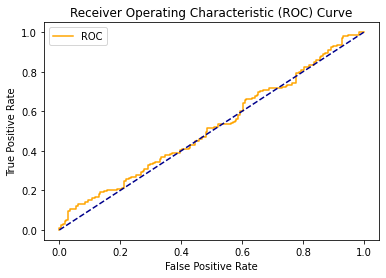

In [66]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

model = SVC(probability=True)
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

    
    
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# XGBoost Algorithm

In [67]:
model = XGBClassifier()

model.fit(X_train, y_train)

y_pred =  model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [68]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
xgb_result = accuracy_score(y_test,y_pred)
print("Accuracy:",xgb_result*100)

Confusion Matrix:
[[ 90  89]
 [ 74 100]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.55      0.50      0.52       179
           1       0.53      0.57      0.55       174

    accuracy                           0.54       353
   macro avg       0.54      0.54      0.54       353
weighted avg       0.54      0.54      0.54       353

Accuracy: 53.82436260623229


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 0.51


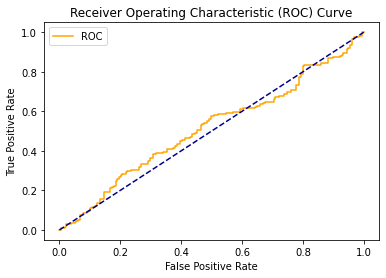

In [69]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = XGBClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [70]:
results_123 = pd.DataFrame([

    {'Algorithm' : 'K-Nearest Neighbors (KNN)', 'Accuracy' : knn_result*100},
    
    {'Algorithm' : 'Random Forest', 'Accuracy' : rf_result*100},
    
    {'Algorithm' : 'Gradient Boosting', 'Accuracy' : clf_result*100},
    
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : svm_result*100},
    
    {'Algorithm' : 'XGBoost Algorithm (XGB)', 'Accuracy' : xgb_result*100}
    
   

])

results_123.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
4,XGBoost Algorithm (XGB),53.824363
2,Gradient Boosting,52.407932
0,K-Nearest Neighbors (KNN),51.274788
1,Random Forest,51.274788
3,Support Vector Machine,49.291785


# Strategy num 2

In [73]:
training_set = data.iloc[:,1:2].values

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.6285715 ],
       [0.61410929],
       [0.53074662],
       ...,
       [0.48921954],
       [0.50139527],
       [0.50336291]])

In [75]:
data

,Open,High,Low,Close,Adj Close,Volume,y,50_sma,200_sma,signal
199,0.639016,0.628571,0.649624,0.637990,0.450788,0.062128,-1,0.426598,0.546675,0
200,0.632151,0.614109,0.639885,0.624570,0.436225,0.183391,-1,0.425130,0.546103,0
201,0.547941,0.530747,0.550133,0.526153,0.329431,0.402289,1,0.421119,0.545153,0
202,0.522311,0.528160,0.539398,0.529364,0.332916,0.157242,1,0.417487,0.544429,0
203,0.539359,0.556496,0.565073,0.565726,0.372372,0.119071,1,0.414483,0.543964,0
...,...,...,...,...,...,...,...,...,...,...
1757,0.473455,0.461425,0.497100,0.480259,0.820377,0.062259,1,0.674625,0.790934,0
1758,0.480995,0.469911,0.502077,0.492137,0.837364,0.078981,1,0.673370,0.792127,0
1759,0.492604,0.489220,0.521062,0.504255,0.854695,0.056975,1,0.672066,0.793331,0
1760,0.502178,0.501395,0.529281,0.512894,0.867049,0.077581,1,0.671750,0.794623,0


In [76]:
x= data.iloc[:, :-3]
y= data.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(x, y,test_size= 0.2,shuffle= True,random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
print(f"No. of training examples:{x_train.shape[0]}")
print(f"No. of testing examples:{x_test.shape[0]}")

No. of training examples:1250
No. of testing examples:313


# K-Nearest Neighbor

In [78]:
#Fit the model in training set and using scalar transform
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
#using classifiers/model knn = 5
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [80]:
#Making the prediction system using classifier and prediction
y_pred = classifier.predict(x_test)

In [81]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
knn_result = accuracy_score(y_test,y_pred)
print("Accuracy:",knn_result*100)

Confusion Matrix:
[[110  25]
 [ 24 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       135
           1       0.86      0.87      0.86       178

    accuracy                           0.84       313
   macro avg       0.84      0.84      0.84       313
weighted avg       0.84      0.84      0.84       313

Accuracy: 84.34504792332268


AUC: 0.93


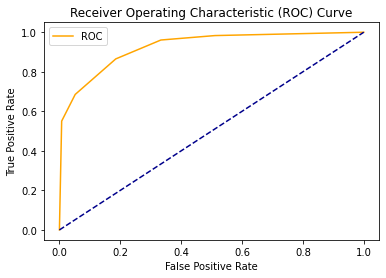

In [82]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = KNeighborsClassifier()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Random Forest

In [83]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [84]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [85]:
#fit the model on train dataset
model.fit(x_train, y_train)

#predict infection rate on 30% test data
y_pred =  model.predict(x_test)

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
rf_result = accuracy_score(y_test,y_pred)
print("Accuracy:",rf_result*100)

Confusion Matrix:
[[110  25]
 [ 24 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       135
           1       0.86      0.87      0.86       178

    accuracy                           0.84       313
   macro avg       0.84      0.84      0.84       313
weighted avg       0.84      0.84      0.84       313

Accuracy: 84.34504792332268


AUC: 0.95


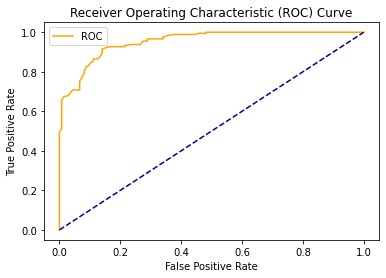

In [86]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = RandomForestClassifier()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)

In [89]:
#fit the model on train dataset
model.fit(x_train, y_train)

y_pred =  model.predict(x_test)

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
clf_result = accuracy_score(y_test,y_pred)
print("Accuracy:",clf_result*100)

Confusion Matrix:
[[111  24]
 [ 16 162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       135
           1       0.87      0.91      0.89       178

    accuracy                           0.87       313
   macro avg       0.87      0.87      0.87       313
weighted avg       0.87      0.87      0.87       313

Accuracy: 87.22044728434504


AUC: 0.93


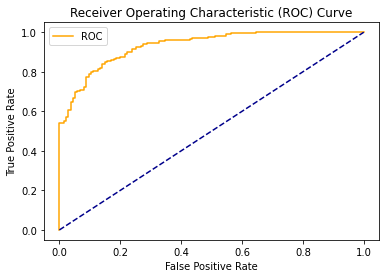

In [90]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = GradientBoostingClassifier()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Support Vector Machine

In [91]:
from sklearn.svm import SVC

In [92]:
from sklearn.svm import SVC
svm = SVC (kernel="linear", C=0.025, random_state=101)
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

In [93]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
svm_result = accuracy_score(y_test,y_pred)
print("Accuracy:",svm_result*100)

Confusion Matrix:
[[ 88  47]
 [ 33 145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       135
           1       0.76      0.81      0.78       178

    accuracy                           0.74       313
   macro avg       0.74      0.73      0.74       313
weighted avg       0.74      0.74      0.74       313

Accuracy: 74.4408945686901


AUC: 0.90


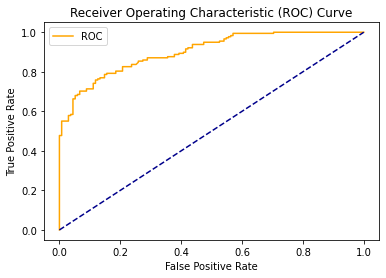

In [94]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

model = SVC(probability=True)
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

    
    
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# XGBoost Algorithm

In [95]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [96]:

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
xgb_result = accuracy_score(y_test,y_pred)
print("Accuracy:",xgb_result*100)

Confusion Matrix:
[[111  24]
 [ 18 160]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       135
           1       0.87      0.90      0.88       178

    accuracy                           0.87       313
   macro avg       0.87      0.86      0.86       313
weighted avg       0.87      0.87      0.87       313

Accuracy: 86.5814696485623


[15:07:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AUC: 0.95


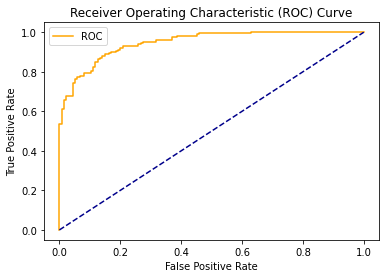

In [97]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = XGBClassifier()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [98]:
results_123 = pd.DataFrame([

    {'Algorithm' : 'K-Nearest Neighbors (KNN)', 'Accuracy' : knn_result*100},
    
    {'Algorithm' : 'Random Forest', 'Accuracy' : rf_result*100},
    
    {'Algorithm' : 'Gradient Boosting', 'Accuracy' : clf_result*100},
    
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : svm_result*100},
    
    {'Algorithm' : 'XGBoost Algorithm (XGB)', 'Accuracy' : xgb_result*100}
    
   

])

results_123.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
2,Gradient Boosting,87.220447
4,XGBoost Algorithm (XGB),86.581470
0,K-Nearest Neighbors (KNN),84.345048
1,Random Forest,84.345048
3,Support Vector Machine,74.440895


# Parameters Tunning 

In [99]:
model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model=model.fit(x_train,y_train)
result=model.predict(x_test)
dt_result = accuracy_score(y_test,y_pred)
print("Accuracy:",dt_result*100)

Accuracy: 86.5814696485623
